# Welcome to the Polyverse : An Introduction to Polymers and Their Representation

## Table of Contents:
1. [Introduction](#introduction)
2. [Organic Molecule and Monomers](#orgmol)
3. [Datasets with Organic Molecules](#polydata)
      - [Setup](#setup)
4. [Monomer / Molecules Representation](#monorep)
      - [RDKit Molecule](#rdkitmol)
      - [SMILES](#smiles)
      - [Image](#image)
      - [Graphs](#graphs)
      - [Fingerprints](#fingerprints)
5. [Polymer Representation](#sample-poly)
      - [Degree of Polymerization](#dp)
      - [Linear Polymer Representation](#line-pres)
6. [Limitations](#limitations)



## 1. Introduction <a class="anchor" id="introduction"></a>

In the vast world of materials, polymers stand out for their remarkable versatility. These giants of the molecular world are built from smaller units called monomers, which link together in long chains like beads on a string.  Unlike individual monomers, which often lack complete functionality on their own, polymers possess a wide range of properties influenced by the type of monomer, the length of the chain (degree of polymerization), and the way the monomers are arranged. This intricate structure allows polymers to take on diverse forms, from the flexible plastics in our everyday lives to the strong and lightweight materials used in engineering. The ability to tailor these properties through the selection and arrangement of monomers makes polymers an invaluable resource for scientists and engineers, driving innovations in fields like medicine, electronics, and sustainable materials.

As the field of machine learning continues to evolve, so too does its application in polymer science. A key area of focus is the development of robust polymer representations that effectively capture the intricate structure of these macromolecules. These representations encode crucial information beyond just the chemical identity of the monomers. This detailed information is essential for accurately predicting a polymer's properties, a capability with transformative potential for material design. By leveraging machine learning models trained on vast datasets of polymers represented in this way, researchers can accelerate the discovery of novel materials with precisely tailored functionalities for a wide range of applications. This integration of machine learning holds great promise for revolutionizing polymer science and unlocking a new era of material innovation.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1O7KOBy4I-U8JRYeoa5Dp9UOxYmVpsLl5?usp=sharing)

## 2. Organic Molecule and Monomers <a class="anchor" id="orgmol"></a>

Organic molecules are the building blocks of life and form the foundation of a vast array of natural and synthetic materials. They are defined as molecules that primarily consist of carbon atoms, along with hydrogen, oxygen, and other elements like nitrogen, phosphorus, and sulfur. These carbon atoms bond with each other and other elements in various arrangements, creating a remarkable diversity of structures and functionalities. Organic molecules encompass everything from simple sugars and amino acids to complex biomolecules like DNA and proteins.

Monomers, on the other hand, are a specific type of organic molecule. They act as the fundamental building blocks of polymers, much like bricks are to a wall. Just as individual bricks come together to form a complex structure, monomers link repeatedly to create long, chain-like molecules known as polymers.

However, there's a key distinction between monomers and organic molecules in general. Organic molecules can exist independently and possess unique properties based on their specific structure. In contrast, monomers often lack complete functionality on their own and rely on the polymerization process to achieve their final properties. While some organic molecules might share similarities with monomers in terms of structure, the key difference lies in their intended purpose. Monomers are designed to be the starting point for creating a larger polymer, while organic molecules can function as standalone entities with their own characteristic behaviors.

## 3. Datasets with Organic Molecules <a class="anchor" id="polydata"></a>

Many datasets exist for organic molecules, each containing various properties and classifications (parameters and labels). Notably, DeepChem's architecture allows us to directly utilize the ZINC15 database, a popular resource from the MoleculeNet suite.

* [ZINC15](https://zinc15.docking.org/)

  - ZINC15 contains information about millions of commercially available chemicals, including their structures, properties, and suppliers.
  - It's a valuable resource for researchers in drug discovery, materials science, and other fields that rely on small molecules.
  - As ZINC15 is a superset of Drug Based Organic Molecules we can find biocompatible monomers in it as well



### Setup <a class="anchor" id="setup"></a>

In [ ]:
!pip install --pre deepchem matplotlib rdkit networkx dgl

For this tutorial we are going to need deepchem along with few of other libraries. [`matplotlib`](https://matplotlib.org/), [`rdkit`](https://www.rdkit.org/), [`networkx`](https://networkx.org/), [`dgl`](https://www.dgl.ai/)

### Loading [ZINC15](https://zinc15.docking.org/) Dataset from deepchem MoleculeNet

- Loading any dataset in `deepchem` requires a featurizer to specify what form of data will be downloaded for your specific usecases.
- By default the ZINC15 data is downloaded with one-hot encoding featurizer. But to extract and anlyze the data as per our requirements we need to load it in raw molecular format. Hence the `RawFeaturizer` is used.

In [ ]:
# all imports
from deepchem.molnet.load_function.zinc15_datasets import load_zinc15
from deepchem.feat.molecule_featurizers.raw_featurizer import RawFeaturizer
from deepchem.feat.molecule_featurizers.smiles_to_image import SmilesToImage  # this featurizer converts smiles string to image
from deepchem.data.datasets import Dataset
from rdkit import Chem
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# raw data loading
raw_feat = RawFeaturizer() # this mentions the loader that we need raw molecular data
zinc15_raw_data = load_zinc15(featurizer=raw_feat)

### Utility functions

- Initially the tuple returned by the `load_zinc15` function doesn't represent only molecular data rather it holds a lot of other data including transformers and tasks. Hence we have to write an utility function that gives us a molecular data directly from the dataset

- The dataset again returns an iterable for easier processing. To get an molecule we have to iterate through the dataset. Hence we write another utility function to get the first value from the training set.

In [4]:
# utility functions
def get_training_data(dataset: Dataset, verbose=1):
  """
  This function returns the training set from the Dataset
  """
  a,b,c = dataset
  print("tasks>> ",a) if verbose else None #  a represents tasks
  m,n,o = b # b reprsents the training, validating and testing dataset split tuple
  if verbose:
    print("training dataset>> ",m) # traning set (200K) (iterable)
    print("validation dataset>> ",n) # validation set (25K)
    print("testing dataset>> ",o) # test set (25K)
    print("transformer>> ",c) # c represents the transformer (default - normalization tranformer)
  return m

def data_verbose(dataset: Dataset, verbose=1):
  """
  This function prints the first data while iterating through the training set
  """
  m = get_training_data(dataset, verbose=verbose)
  one_mol = None
  # showing a sample data
  for (xi,yi,wi, idi) in m.itersamples():
    one_mol = xi
    if verbose:
      print("Molecule Object >>",xi)
      print("Task Target Value>>",yi) # the target label for the dataset
      print("Weight >>",wi) # weight associated
      print("ZINC ID>>",idi) # zinc id for the molecule
    return one_mol

tasks>>  ['mwt', 'logp', 'reactive']
training dataset>>  <DiskDataset X.shape: (200000,), y.shape: (200000, 3), w.shape: (200000, 3), task_names: ['mwt' 'logp' 'reactive']>
validation dataset>>  <DiskDataset X.shape: (25000,), y.shape: (25000, 3), w.shape: (25000, 3), task_names: ['mwt' 'logp' 'reactive']>
testing dataset>>  <DiskDataset X.shape: (25000,), y.shape: (25000, 3), w.shape: (25000, 3), task_names: ['mwt' 'logp' 'reactive']>
transformer>>  [<deepchem.trans.transformers.NormalizationTransformer object at 0x7e018619cd90>]
Molecule Object >> <rdkit.Chem.rdchem.Mol object at 0x7e004060e200>
Task Target Value>> [-1.02361809  0.52607265 -0.33937455]
Weight >> [1. 1. 1.]
ZINC ID>> ZINC000623827104


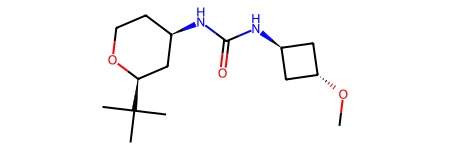

In [5]:
data_verbose(zinc15_raw_data)

In the above code the dataset is loaded from molnet and the training data is extracted from the output using `get_training_data` and shown in the notebook using `data_verbose`. But the molecule object can be represented in various ways other than this image. Let's dive into it.

## 4. Monomer Molecules Representation <a class="anchor" id="monorep"></a>


* Types of representation for monomer molecules

The monomer molecules can be represented in various ways. Some of the common ways of representations are given below.
  - RDKit Molecule Object
  - SMILES String
  - Image
    - Pixel Representation
    - Annotated Representation
  - Graphs
  - Fingerprint


##### We are going to use above representations on ZINC15 dataset for representing organic molecules. The monomers can be represented similarly.

#### i.  RDKit Molecule Object <a class="anchor" id="rdkitmol"></a>

- The [RDKit](https://www.rdkit.org/) library is a very powerful python library that can handle chemical data very efficiently.
- In the deepchem, the Molecule object from RDKit is used as a base format to load and process molecules.
- The Molecule object is capable to storing and processing different scientific parameters.

Let's find the number of atoms and bonds using the Molcule object.

No. of atoms in the molecule >> 20
No. of bonds in the molecule >> 21


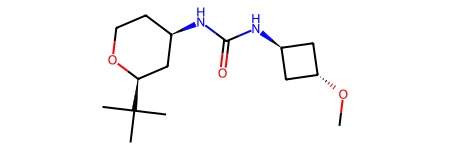

In [6]:
# loading as a RDKit Molecule Object
first_molecule = data_verbose(zinc15_raw_data, verbose=0)
print("No. of atoms in the molecule >>",first_molecule.GetNumAtoms())
print("No. of bonds in the molecule >>",first_molecule.GetNumBonds())
first_molecule

There are 22 number of atoms and 23 bonds in the molcule. We can count and compare using the picture as well.

#### ii.  SMILES String <a class="anchor" id="smiles"></a>

- SMILES stands for "Simplified Molecular-Input Line-Entry System".
- SMILES Strings are the most generic way of representing organic molecules.
- It uses a simple text-based arrangement to represent the complex organic molecules.
- Because of it's a textual representation it can be represented in publications easily and be used in various sequence based neural networks as well.

There are at least two ways we can load the SMILES string in this context
- We can load it from the MoleculeNet using featurizer
- We can use the RDKit Molecule object to get SMILES string

In [7]:
# loading ZINC15 data as SMILES String
smiles_feat = RawFeaturizer(smiles=True)  # featurizer to get smiles
zinc15_smiles_data = load_zinc15(featurizer=smiles_feat)  # loading the zinc15 dataset
"SMILES >> " + data_verbose(zinc15_smiles_data, verbose=0)

'SMILES >> CC1CCC(CN2C[C@H](O)[C@H](NC(=O)C3(F)CCCCC3)C2)CC1'

In the above code example we downloaded the SMILES data of ZINC15 dataset directly from the MoleculeNet.

In [8]:
first_molecule = data_verbose(zinc15_raw_data, verbose=0)  # getting the first molecule in training set
print("First Molecule >>",first_molecule)
first_smiles = Chem.MolToSmiles(first_molecule)  # converting the molecule object to smiles
print("SMILES of the Molecule>>", first_smiles)

First Molecule >> <rdkit.Chem.rdchem.Mol object at 0x7e004060e200>
SMILES of the Molecule>> CO[C@H]1C[C@H](NC(=O)N[C@@H]2CCO[C@H](C(C)(C)C)C2)C1


In above code example we got the first molecule in the training set using `data_verbose` and converted it into SMILES using `RDKit`

#### iii.  Images  <a class="anchor" id="image"></a>

- Molecules can also be represented with images. The images of the monomer can also be of two types.
  - One is pixel based, where the structure of the atoms are given of importance.
  - Another is annotation based, where the type of bonds and the elements are given importance to.

##### Pixel Based Image Representation

In [9]:
# utility function
def image_verbose(dataset: Dataset, verbose=1):
  """
  This function gets the first element in the dataset and plots the image and returns it as well
  """
  m = get_training_data(dataset, verbose=verbose)
  smiles2img_feat = SmilesToImage(img_size=80)    # smiles to image featurizer to get images of 80x80x1 dimension
  img=None
  # showing a sample image from molecular data
  for (xi,yi,wi, idi) in m.itersamples():
    if verbose:
      print("x0 >>",xi)
      print("y0 >>",yi)
      print("w0 >>",wi)
      print("id0 >>",idi)
    img = smiles2img_feat._featurize(xi) # getting the image array from smiles
    # print("image array>>",img)
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap="gray")   # showing the image array using matplotlib
    plt.axis('off')
    plt.show()
    return img

The above function `image_verbose` uses `SmilesToImage` class to convert the SMILES values to images.



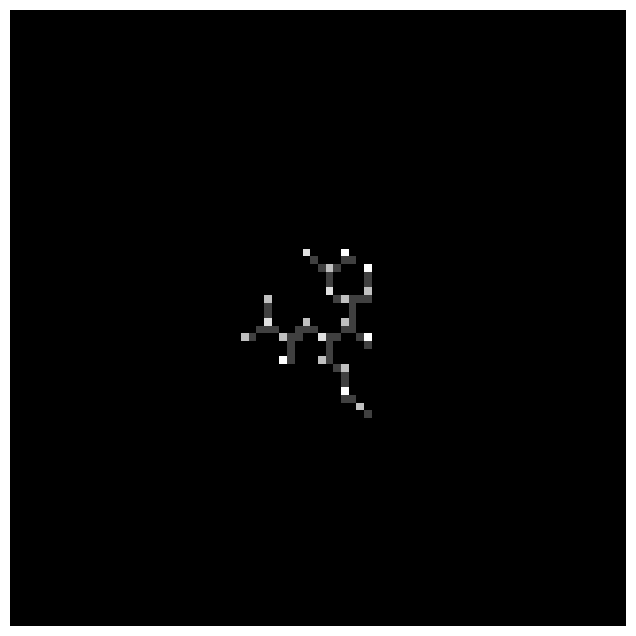

In [ ]:
# formatting as Image [ Faster to visualize the image ]
img_array = image_verbose(zinc15_raw_data, verbose=0)

In the above image we can see the atoms represented as white dots while the bonds are represented with gray. This representation is very useful typically in case of training vision models to understand the visual features of molecules.

This method is preferable to visualize a specific molecule.

But for bulk use cases we can also download the ZINC15 data as image. The code using the image featurizer is given below.

In [11]:
# loading as Image [ Comparatively slower due to downloading image data ]
image_feat = SmilesToImage(img_size=80, img_spec='std') # the same smiles to image featurizer can also be used with molnet loader function to load the image data
zinc15_raw_data = load_zinc15(featurizer=image_feat)
data_verbose(zinc15_raw_data)

##### Annotatation Based Image Representation

Although the pixel based representation is good for training vision models to understand the patterns in a molecular structure, the overall understanding of the moleclue can't be visualized with it. Hence we can use annotation based image representation to understand and visualize molecule in a better way.

In [12]:
# utility function
def rdkit_image_verbose(dataset: Dataset, verbose=1):
  """
  This function shows the molecules as image with annotations for atoms and bonds
  """
  m = get_training_data(dataset, verbose=verbose)
  img = None
  for (xi,yi,wi, idi) in m.itersamples():
    if verbose:
      print("y0 >>",yi)
      print("w0 >>",wi)
      print("id0 >>",idi)
    img = Chem.Draw.MolToImage(xi)   # getting the image array from molecule
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()
    return img

The function `rdkit_image_verbose` gets the image array (with colored annotations) for a specific molecule and plots it for visualization. Let's run the function now.

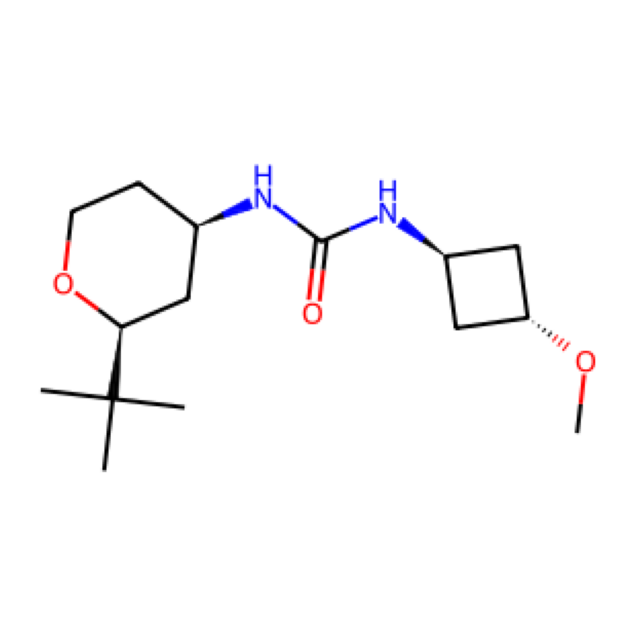

In [13]:
rdkit_image = rdkit_image_verbose(zinc15_raw_data,verbose=0)

Now, the above image representation shows all the atoms with bonds. The visualization of this kind is very useful for understanding the molecule / monomer.

#### iv.  Graphs  <a class="anchor" id="graphs"></a>

- The graph datastructure is made of two main component i.e. nodes and edges. The nodes are connected using edges making a network like interpretation. This interpretation is very realistic in the case of molecules where atoms are considered as nodes and edges are the bonds connecting them.
- In the following steps we will convert the molecules into graph and represent it as an image.
  - We will first convert the molecule to a graph using `networkx` library.
  - Then we will use `matplotlib` to plot this graph.
  - We will use above two steps with the dataset to show the graph of first element in ZINC15 dataset.

In [14]:
# utility function
def mol_to_nx(mol):
  G = nx.Graph() # initiate the graph object

  for atom in mol.GetAtoms(): # iterating through atoms
      G.add_node(atom.GetIdx(),
                atomic_num=atom.GetAtomicNum(),
                is_aromatic=atom.GetIsAromatic(),
                atom_symbol=atom.GetSymbol())  # assigning nodes representing atoms

  for bond in mol.GetBonds(): # iterating through bonds
      G.add_edge(bond.GetBeginAtomIdx(),
                bond.GetEndAtomIdx(),
                bond_type=bond.GetBondType()) # assigning edges representing bonds

  return G # returning final graph

The above function `mol_to_nx` creates an empty graph and assigns atoms as nodes and bonds as edges.

In [15]:
# utility function
def draw_graph(graph, figsize=(6,6)):
  atoms = nx.get_node_attributes(graph, 'atom_symbol')  # getting symbol or characters for each atom

  color_map = {'C': 'cyan',
              'O': 'orange',
              'N': 'magenta',
               "Cl": "pink"}  # map color to special symbol or character

  colors = []
  for idx in graph.nodes():
      if (graph.nodes[idx]['atom_symbol'] in color_map):
        colors.append(color_map[graph.nodes[idx]['atom_symbol']])   # assign colors to the list by using the color map
      else:
        colors.append('gray') # if the symbol is not in the color map assigning gray

  plt.figure(figsize=figsize)
  nx.draw(graph,
          labels=atoms,
          with_labels = True,
          node_color=colors,
          node_size=800)  # drawing the graph

  plt.show()

The function `draw_graph` determines the color of the nodes as per the atom and then plots it as a pyplot figure.

In [16]:
# utility function
def networkx_graph_verbose(dataset: Dataset, verbose=1):
  for xi,_,_,_ in dataset[1][0].itersamples():
    repr = xi
    # conver rdkit molecule object to networkx object
    repr_nx = mol_to_nx(repr)  # getting the graph object for
    if verbose:
      print(repr_nx)
    draw_graph(repr_nx)
    return repr_nx

The function `networkx_graph_verbose` combines `mol_to_nx` and `draw_graph` to plot the first element in the training set of the a dataset.

Let's plot the an element in ZINC15 dataset.

Graph with 20 nodes and 21 edges


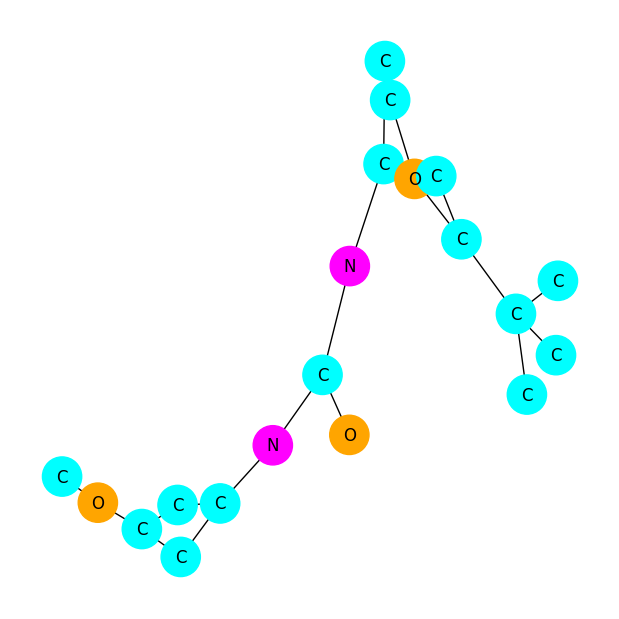

In [17]:
# graph representation of RDKit Molecule object
graph_repr = networkx_graph_verbose(zinc15_raw_data)

This way we can represent the graphical version of the molecules.

#### v.  Fingerprints <a class="anchor" id="fingerprints"></a>

Imagine you have a unique fingerprint that identifies you. In the world of tiny molecules, there's a similar concept called a fingerprint! But instead of lines on your finger, a molecule's fingerprint is a special code made up of 0s and 1s.

This code doesn't look like a real fingerprint, but it helps scientists identify similar molecules. It's like a secret code that captures the important features of the molecule, like the types of atoms it has and how they're connected.

Here's why this is useful:

- **Finding similar molecules**: Just like fingerprints help identify people, a molecule's fingerprint can help scientists find other molecules with similar structures. This is useful for things like medicine, where scientists might look for molecules with similar structures to existing drugs.
- **Organizing molecules**: Imagine having a million different molecules! Fingerprints help scientists group molecules with similar structures together, making it easier to understand and manage large collections of molecules.


Think of it like sorting clothes – you wouldn't mix shirts with socks! Fingerprints help scientists sort molecules in a similar way, based on their structure. Using following code we will load ZINC15 dataset with fingerprints.

In [18]:
# finger print representation [ loading of zinc15 dataset with fingerprint will take a little time ]
zinc15_fingerprint_data = load_zinc15(featurizer="ECFP") # extended-connectivity fingerprints (ECFPs) is a circular fingerprint method

Let's see how the `zinc15_fingerprint_data` looks like.

In [19]:
# data_verbose(zinc15_fingerprint_data)
a,b,c = zinc15_fingerprint_data
# print("tasks>> ",a) # tasks
m,n,o = b
# print("training dataset>> ",m) # traning set (200K) (iterable)
# print("validation dataset>> ",n) # validation set (25K)
# print("testing dataset>> ",o) # test set (25K)
# print("transformer>> ",c) # transformer (default normalization)
for (xi,yi,wi, idi) in m.itersamples():
    print("x0 type >>",type(xi))
    print("x0 shape >>",xi.shape)
    print("x0 >>",xi)
    print("y0 >>",yi)
    print("w0 >>",wi)
    print("id0 >>",idi)
    break

x0 type >> <class 'numpy.ndarray'>
x0 shape >> (1024,)
x0 >> [0. 1. 0. ... 0. 0. 0.]
y0 >> [-1.02692611 -1.47803033 -0.33883536]
w0 >> [1. 1. 1.]
id0 >> ZINC001392541331


When we load the ZINC15 fingerprint data, the output is a special code stored in a numpy array. This code only uses 0s and 1s, similar to a binary code. In this specific case, the code is always 1024 numbers long, regardless of the molecule.

This consistent size (1024) is helpful because it makes it easier to use these fingerprints with neural networks. Neural networks need data in a uniform format, and the constant size ensures everything lines up correctly when fed into the network

## 5. Polymer Representation <a class="anchor" id="sample-poly"></a>

Imagine building a massive structure with countless tiny bricks. In the world of materials, polymers are like these grand structures, but instead of bricks, they're built from smaller units which are monomers. These monomers, often individual molecules themselves, link together in long chains, creating the foundation for the diverse properties and applications of polymers we encounter in everyday life.

a. **Degree of Polymerization**  <a class="anchor" id="dp"></a>

  Building on our analogy of polymers as massive structures built from tiny bricks, let's delve deeper into the concept of monomers. Each polymer chain is essentially constructed by linking numerous monomers together, but the number of monomers used can vary significantly. This variation is known as the degree of polymerization (DP). Imagine building a small wall with just a few bricks compared to a towering skyscraper requiring thousands. Similarly, the DP determines the length of the polymer chain, impacting its properties like strength, flexibility, and melting point. A higher DP generally translates to a longer chain, often leading to increased strength and rigidity. Understanding the degree of polymerization is crucial for tailoring polymers with specific properties for various applications.

b. **Linear Polymer Representations**  <a class="anchor" id="line-pres"></a>

  Let's represent two polymers by extending the monomer representation methods.


- Polyethylene  (PE)
- Polyvinylchloride (PVC)


#### 1. Polyethylene (PE)

With following steps we can represent Polyethylene

1. Get SMILES of ethylene monomer
2. Define Degrees of Polymerization (DP)
3. Form a new SMILES for polymer using DP
4. Add Hydrogen Atom for visualization

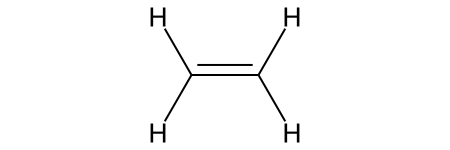

In [20]:
# Let's consider ethylene
M_SMILES = "C=C" # SMILES of ethylene
M_MOL = Chem.MolFromSmiles(M_SMILES)
Chem.rdmolops.AddHs(M_MOL)

In the above example we loaded the ethylene molecule using it's SMILES (C=C) and added H anottation for complete representation.

During the polymerization of ethylene the double bond (=) in the middle breaks and the chain connects with adjacent ethylene monomers forming a long polymer chain. For our case, let's say there are 20 ethylene monomers those form the polymer chain. ( Degree of Polymerization = 20 ) Now the new SMILES will be nothing but 20 times "CC".

In [21]:
DP = 20
P_SMILES = "CC"*DP
P_MOL = Chem.MolFromSmiles(P_SMILES)

Let's visualize the polymer molecule

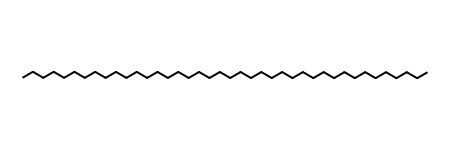

In [22]:
P_MOL

Let's add hydrogen atom for proper visulization !

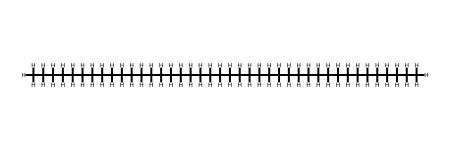

In [23]:
P_MOL_W_H = Chem.rdmolops.AddHs(P_MOL)
P_MOL_W_H

Now, we got the RDKit Molecular object, SMILES string, and image representation
Let's see how the graph representation works for polyethylene.

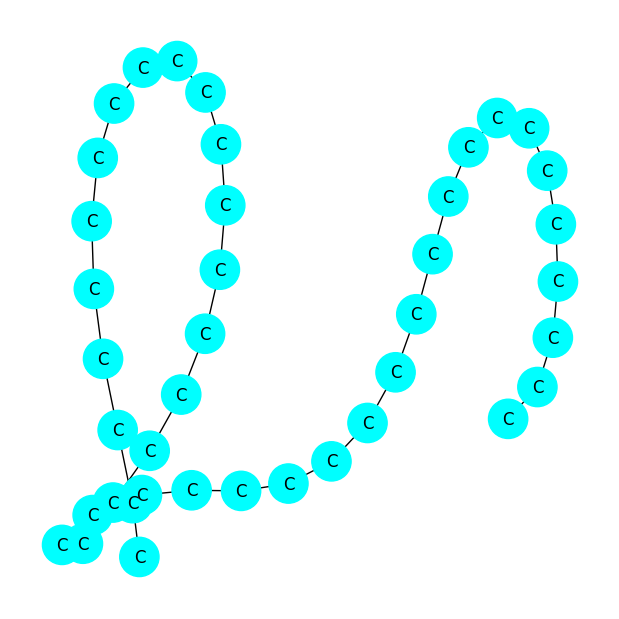

In [24]:
P_GRAPH = mol_to_nx(P_MOL)
draw_graph(P_GRAPH)

Now we can see the graph representing the polymer chain

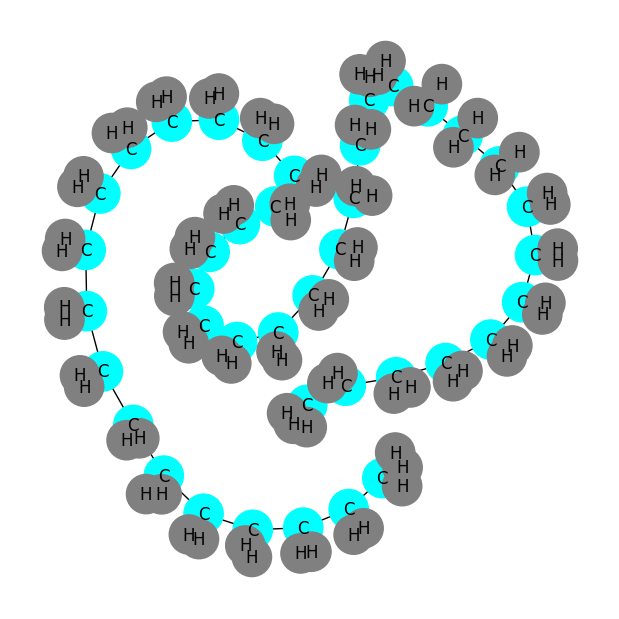

In [25]:
P_GRAPH_W_H = mol_to_nx(P_MOL_W_H)
draw_graph(P_GRAPH_W_H)

In these ways we can represent the polymer chain as macromolecule.

#### 2. Polyvinylchloride (PVC)

With following steps we can represent Polyvinylchloride

1. Get SMILES of vinlychloride molecule
2. Define Degrees of Polymerization (DP)
3. Form a new SMILES for PVC using DP
4. Add Hydrogen Atom for visualization

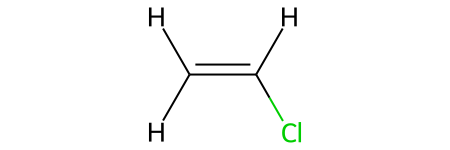

In [26]:
M_SMILES = "C=C(Cl)" # SMILES of vinyl chloride
M_MOL = Chem.MolFromSmiles(M_SMILES)
Chem.rdmolops.AddHs(M_MOL)

During the polymerization of vinyl chloride the double bond (=) in the middle breaks and the chain connects with adjacent vinyl chloride monomers forming a long polymer chain. For our case, let's say there are 20 vinly chloride monomers those form the polymer chain. ( Degree of Polymerization = 20 ) Now the new SMILES will be nothing but 20 times "CC(Cl)" with an additional C at the end of the chain for complete visualization.

In [27]:
DOP = 20
P_SMILES = "CC(Cl)"*DOP+"C"
P_MOL = Chem.MolFromSmiles(P_SMILES)

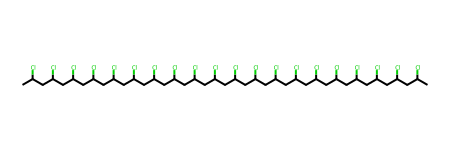

In [28]:
P_MOL

Considering Hydrogen atom

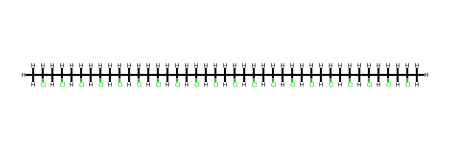

In [29]:
P_MOL_W_H = Chem.rdmolops.AddHs(P_MOL)
P_MOL_W_H

Now representing the graph structure of the PVC

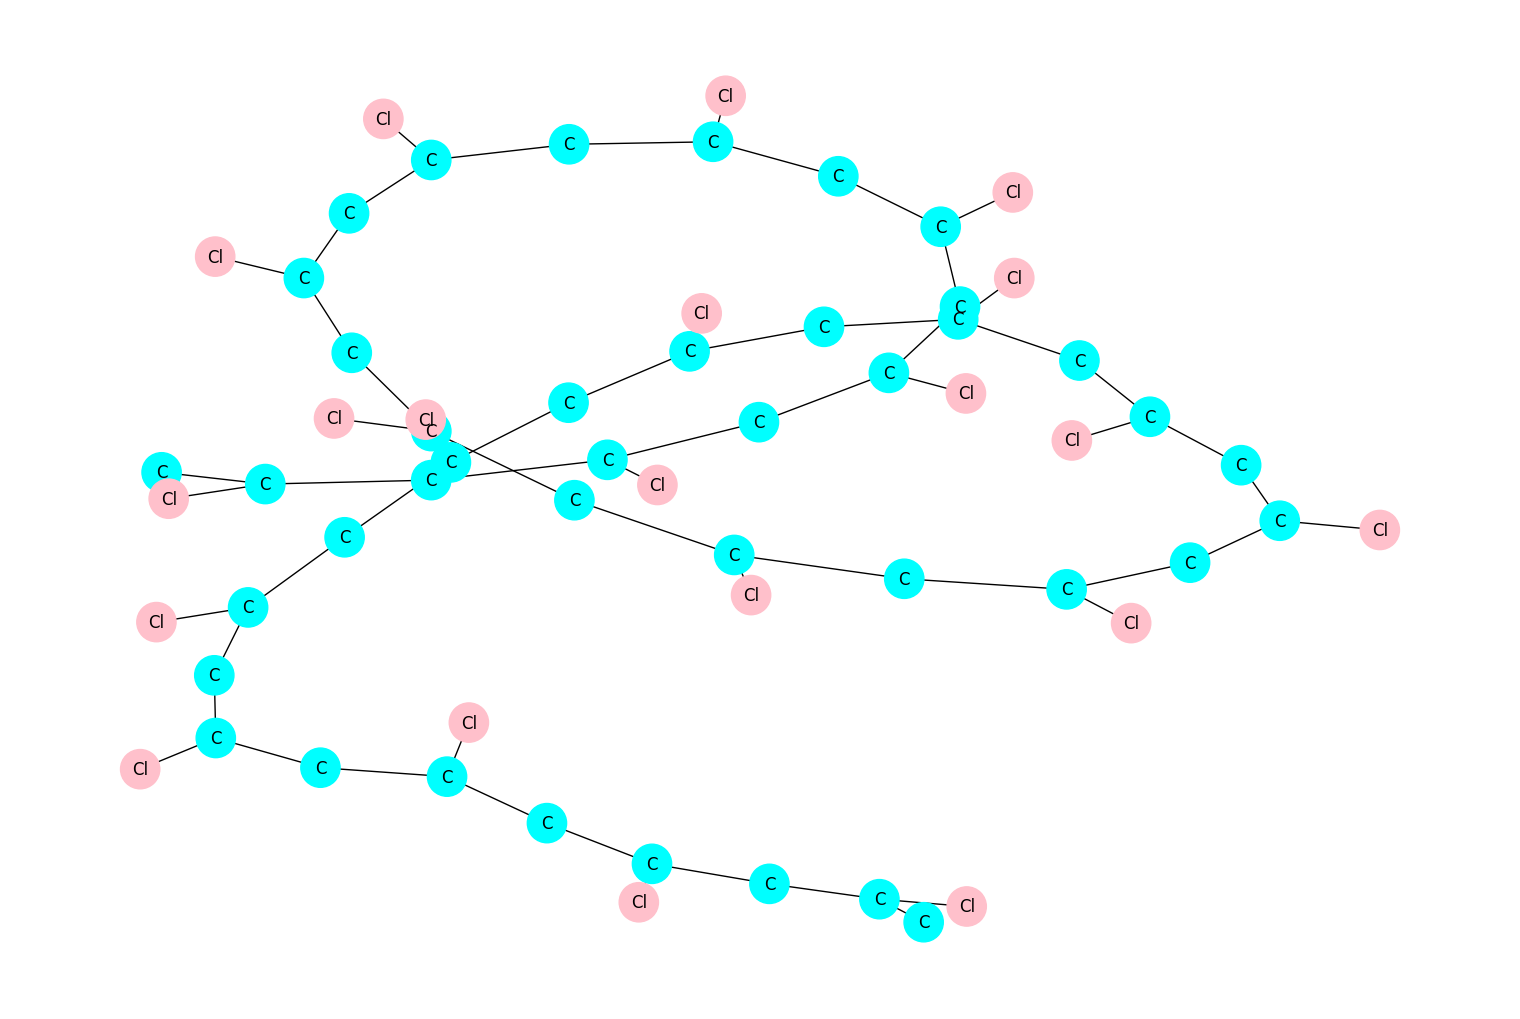

In [30]:
P_GRAPH = mol_to_nx(P_MOL)
draw_graph(P_GRAPH, figsize=(15,10))

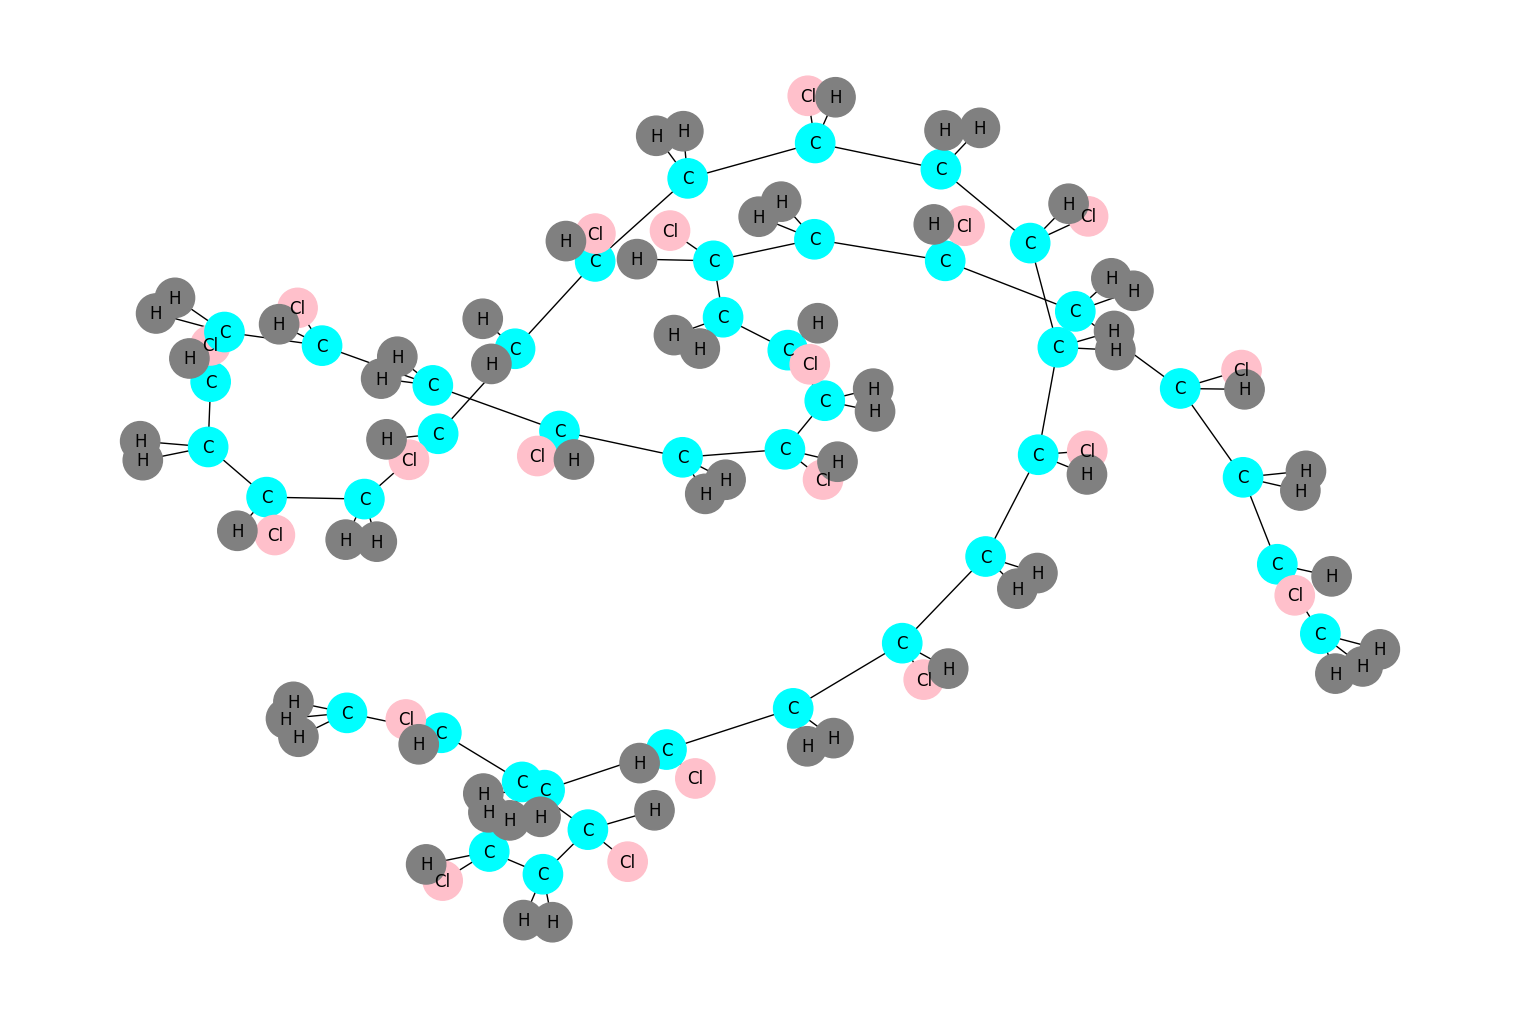

In [31]:
P_GRAPH_W_H = mol_to_nx(P_MOL_W_H)
draw_graph(P_GRAPH_W_H, figsize=(15,10))

These are two polymer represetation. The polyethylene representation is a linear representation of polymer chain while the polyvinylchloride includes chlorine as the halogen group. The introduction of chlorine can introduce complexity considering the chlorine can be reprsented both above or below the main carbon chain.

## 6. Limitations <a class="anchor" id="limitations"></a>

Even if we represented the polymer as a small molecule, it’s not realistic in actual use cases. The current representation can have the following limitations.
1. Actual Degree of Polymerization can range between 10K to 100K for PE. Hence presenting it in repetitive SMILE strings is not realistic.
2. The tacticity of the polymer can’t be determined from the SMILES string or corresponding graph representation.

3. Any other polymerization other than addition polymerization can’t be implemented properly.
4. The repetition of monomers in copolymers can’t be tracked with this approach.
5. Even if we represent the monomers with a graph, we can’t keep the edge open for the next monomer considering the conjunction of the monomer can determine if the polymer is going to be branched, crosslinked, or linear.


# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Gitter
The DeepChem [Gitter](https://gitter.im/deepchem/Lobby) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!

## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/cGzwCdrUqS) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!

## Citing This Tutorial
If you found this tutorial useful please consider citing it using the provided BibTeX.

In [ ]:
@manual{Intro1,
 title={Welcome to Polyverse : An Introduction to Polymers and Their Representation},
 organization={DeepChem},
 author={Mohanty, Debasish},
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/An_Introduction_to_Polymers_and_Their__Representation.ipynb}},
 year={2024},
}